# 定义
具身智能(Embodied AI)：有身体并支持物理交互的智能体，如家用服务机器人、无人车等。 —— “身体力行”
Embodied AI is AI that controls a physical “thing,” like a robot arm or an autonomous vehicle.

1950年，图灵在他的论文 ——《Computing Machinery and Intelligence》中首次提出了具身智能的概念。在之后的几十年里，大家都觉得这是一个很重要的概念，但具身智能并没有取得很大的进展，因为当时的技术还不足以支撑其发展。
> We may hope that machines will eventually compete with men in all purely intellectual fields. But which are the best ones to start with? Even this is a difficult decision. Many people think that a very abstract activity, like the playing of chess, would be best. It can also be maintained that it is best to provide the machine with the best sense organs that money can buy, and then teach it to understand and speak English. This process could follow the normal teaching of a child. Things would be pointed out and named, etc. Again I do not know what the right answer is, but I think both approaches should be tried. ——Alan Turing

上面图灵所说的下围棋和使机器具备感官、能说英语、能学习就分别代表了非具身智能和具身智能，而两种智能形态的此消彼长也贯穿了人工智能研究这跌宕起伏的七十年。

李飞飞：“具身的含义不是身体本身，而是与环境交互以及在环境中做事的整体需求和功能。”
refer to: https://zhuanlan.zhihu.com/p/620342675


# 局限性
LLMs和VLMs在机器人领域落地效果并不好，其主要原因是这些模型欠缺真实物理世界的知识，导致其推理输出很难落地到实际机器人场景中。还有一部分原因是由于现有大模型主要进行语义推理和文本提示，而机器人需要的是可用的机器人运动指令，譬如机械臂末端位置指令或者底盘移动位置指令等，二者无法直接匹配

# High-Level & Low-Level
关于机器人控制层级有很多种分法，为方便理解大模型论文和机器人的结合点，在本文中将控制层级分为5级：

1. 任务级Task Level：我咖啡洒了，你能帮忙吗；
2. 技能级Skill Level：找到抹布、捡起抹布、移动抹布、放下抹布；
3. 动作级Motion Level：直线运动、圆弧运动、样条曲线运动、手抓开合；
4. 基元级Primitive Level：根据动作和机器人物理限制进行轨迹规划完毕之后插值生成的控制指令，包括目标位置、姿态、速度前馈、力矩前馈，一般周期要做到至少500Hz，常见的控制周期现在已经做到1000Hz以上。如果是力控制，这周期一般回到2000~4000hz;
5. 伺服级Servo Level：运行在伺服驱动器里的位置速度电流三环控制；

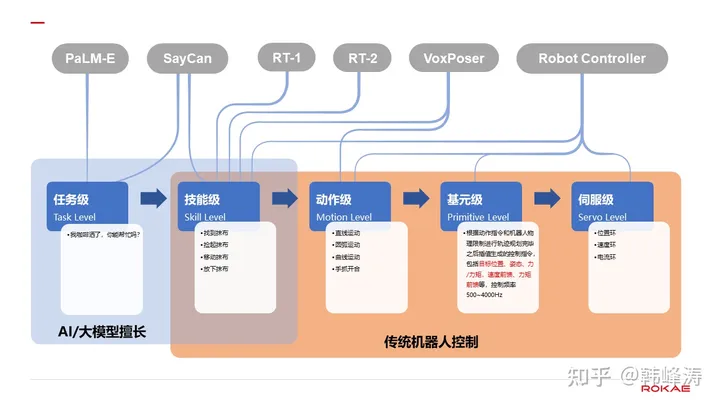

# 论文

## PaLM-E
[paper](https://palm-e.github.io/assets/palm-e.pdf), [github](https://github.com/kyegomez/PALM-E), [official website](https://palm-e.github.io/), [google research](https://blog.research.google/2023/03/palm-e-embodied-multimodal-language.html), [知乎](https://zhuanlan.zhihu.com/p/612536995)

夹具

Driess, D., Xia, F., Sajjadi, M. S., Lynch, C., Chowdhery, A., Ichter, B., ... & Florence, P. (2023). **PaLM-E: An embodied multimodal language model**. arXiv preprint arXiv:2303.03378. | 698

Large language models have been demonstrated to perform complex tasks. However, enabling general inference in the real world, e.g. for robotics problems, raises the challenge of grounding. We propose embodied language models to directly incorporate real-world continuous sensor modalities into language models and thereby establish the link between words and percepts. Input to our embodied language model are multi-modal sentences that interleave visual, continuous state estimation, and textual input encodings. We train these encodings end-to-end, in conjunction with a pre-trained large language model, for multiple embodied tasks, including sequential robotic manipulation planning, visual question answering, and captioning. Our evaluations show that PaLM-E, a single large embodied multimodal model, can address a variety of embodied reasoning tasks, from a variety of observation modalities, on multiple embodiments, and further, exhibits positive transfer: the model benefits from diverse joint training across internet-scale language, vision, and visual-language domains. Our largest model, PaLM-E-562B with 562B parameters, in addition to being trained on robotics tasks, is a visual-language generalist with state-of-the-art performance on OK-VQA, and retains generalist language capabilities with increasing scale.

为了更好的将图像语言大模型的能力和知识迁移到机器人领域，研究人员融合了Google当时最新的大型语言模型PaLM和最先进的视觉模型ViT-22B，使用文本和其他多模态数据（主要来自于机器人的传感器，比如图像、机器人状态、场景环境信息等）代替之前的纯文本作为输入，输出以文本形式表示的机器人运动指令，进行端到端的训练，从而得到了用于机器人任务的多模态大模型PaLM-E（Embodied）。

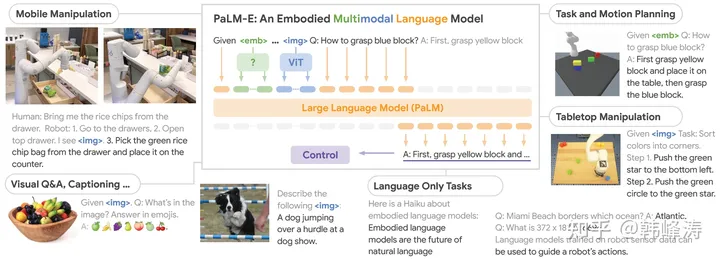

下图简明展示了PaLM-E的机器人操作能力，例如，给机器人下达文字指令：“把抽屉里的薯片拿来给我”，模型会输出以下机器人的运动指令：

移动到抽屉旁边；
打开抽屉；
把薯片从抽屉里拿出来；
把薯片带到用户旁边；
放下薯片；
任务结束；

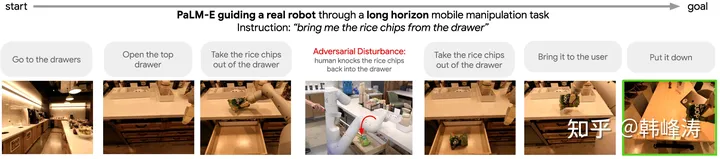
PaLM-E具备拆解和执行长程任务（Long Horizon Task）的能力，以及较强的抗干扰能力（人为的移动或者打掉薯片）

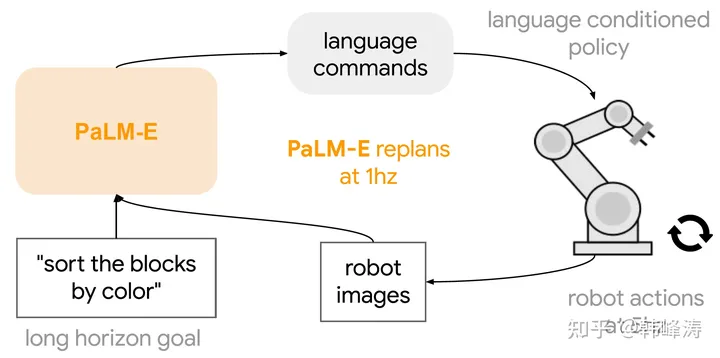
PaLM-E的任务推理频率为1Hz，机器人按照5Hz的控制频率执行Low-level运动

关于机器人执行部分的内容，可以参考Robotics@Google的另一项工作[**Talking to Robots in Real Time**](https://blog.research.google/2022/12/talking-to-robots-in-real-time.html)(todo)。

PaLM-E最大的贡献，是展示了将图像和语言大模型的知识迁移到机器人领域的路径之一，有了大模型的通识理解和推理能力，机器人可以将原有能力更好的泛化到新场景中。

## SayCan
[paper](https://say-can.github.io/assets/palm_saycan.pdf), [github](https://github.com/google-research/google-research/tree/master/saycan), [official website](https://say-can.github.io/), [google research](https://blog.research.google/2022/08/towards-helpful-robots-grounding.html)

Ahn, M., Brohan, A., Brown, N., Chebotar, Y., Cortes, O., David, B., ... & Zeng, A. (2022). **Do as i can, not as i say: Grounding language in robotic affordances**. arXiv preprint arXiv:2204.01691. | 798

Large language models can encode a wealth of semantic knowledge about the world. Such knowledge could be extremely useful to robots aiming to act upon high-level, temporally extended instructions expressed in natural language. However, a significant weakness of language models is that they lack real-world experience, which makes it difficult to leverage them for decision making within a given embodiment. For example, asking a language model to describe how to clean a spill might result in a reasonable narrative, but it may not be applicable to a particular agent, such as a robot, that needs to perform this task in a particular environment. We propose to provide real-world grounding by means of pretrained skills, which are used to constrain the model to propose natural language actions that are both feasible and contextually appropriate. The robot can act as the language model's "hands and eyes," while the language model supplies high-level semantic knowledge about the task. We show how low-level skills can be combined with large language models so that the language model provides high-level knowledge about the procedures for performing complex and temporally-extended instructions, while value functions associated with these skills provide the grounding necessary to connect this knowledge to a particular physical environment. We evaluate our method on a number of real-world robotic tasks, where we show the need for real-world grounding and that this approach is capable of completing long-horizon, abstract, natural language instructions on a mobile manipulator. The project's website and the video can be found at https://say-can.github.io/.

<font color="red">如上述PaLM-E章节所述，大模型可以把高层级的任务拆分成若干个在语义上符合逻辑的子任务，但是由于LLMs普遍缺乏真实物理世界的经验，无法判断其输出会对环境产生什么样的影响，也不知道真实环境和机器人的状态信息以及机器人是否具备执行这些子任务的能力，所以其生成的看似逻辑上合理的子任务指令不一定能在某个实际的场景中被机器人顺利执行</font>。


譬如，对于任务“我把瓜子皮撒地上了，能不能帮忙清理一下？”，大模型输出“使用吸尘器清洁”是符合逻辑的，但实际上执行这项任务的机器人可能还不会使用吸尘器，甚至，家里根本就没有吸尘器。

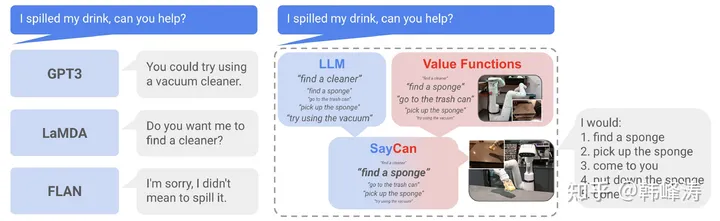

因此，SayCan的设计逻辑很简单，将决定机器人应该如何执行任务的决策拆成两个部分，<font color="red">Say代表大模型LLM，用于输出可用的高层级运动指令，Can代表机器人在当前环境下能做的事情，二者通过值函数（Value Function）的方式结合起来，共同决定选择哪条指令用于实际执行</font>。

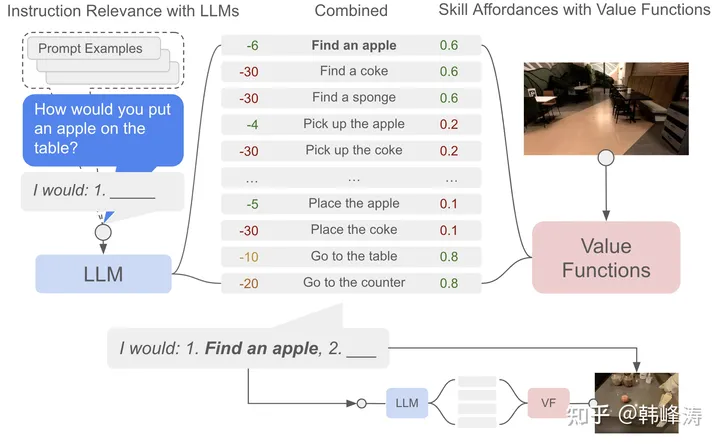

如上图所示，给机器人系统输入“你怎么把苹果放在桌子上？”，对于该任务而言，大模型（Say）输出的最可能的运动输出顺序是

1. 捡起苹果；
2. 放下苹果；
3. 找到苹果；

但是对于机器人（Can）来讲，通过传感器（摄像头）环视一圈发现周边并没有苹果可捡，大模型输出的第一条运动指令“捡起苹果”是无法被执行的，因此机器人机器人输出的运动顺序是

1. 找到苹果；
2. 。。。

结合LLM输出与值函数（VF），SayCan系统最终输出的第一条指令是“先找到苹果”，避免了在周边没有苹果的时候去指挥机器人捡起苹果从而无法完成任务。

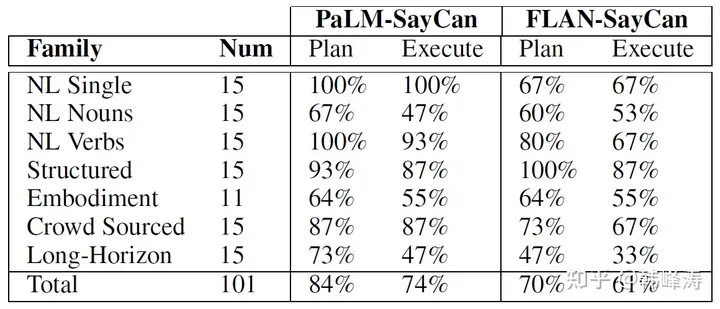

此外，在SayCan的实验过程中，研究人员得出了类似的结论，即模型能力的增长会导致整个机器人系统能力的进步。



## RT-1
[paper](https://robotics-transformer1.github.io/assets/rt1.pdf), [github](https://github.com/google-research/robotics_transformer), [official website](https://robotics-transformer1.github.io/), [google research](https://blog.research.google/2022/12/rt-1-robotics-transformer-for-real.html)

Brohan, A., Brown, N., Carbajal, J., Chebotar, Y., Dabis, J., Finn, C., ... & Zitkovich, B. (2022). **Rt-1: Robotics transformer for real-world control at scale**. arXiv preprint arXiv:2212.06817. | 370

By transferring knowledge from large, diverse, task-agnostic datasets, modern machine learning models can enable solving specific downstream tasks either zero-shot or with small task-specific datasets to a high level of performance. While this capability has been demonstrated in other fields such as computer vision, natural language processing or speech recognition, it remains to be shown in robotics, where the generalization and fine-tuning capabilities of the models are particularly critical due to the difficulty of collecting real-world robotic data. We argue that one of the keys to the success of such general robotic models lies with open-ended task-agnostic training, combined with high-capacity architectures that can absorb all of the diverse, robotic data. In this paper, we present a model class, dubbed Robotics Transformer, that exhibits promising scalable, pre-trained model properties. We verify our conclusions in a comprehensive study of different model classes and their ability to generalize as a function of the data size, model size, and data diversity based on a large-scale data collection on real robots performing real-world tasks.

RT-1是由Robotics@Google和Everyday Robots的研究人员于2022年开发的机器人End-to-End控制模型，主要特征有：
- 基于Transformer的模型，包含一个FiLM-conditioned EfficientNet用于处理图像和文字输入得到vision-language tokens，接着一个TokenLearner用于压缩输入给Transformer模型的Token数量以提升模型推理速度，以及一个Transformer模型；
- <font color="red">采用模仿学习的方式进行训练，输入自然语言和图像，输出机器人运动指令（底盘位置和机械臂末端位置）</font>；
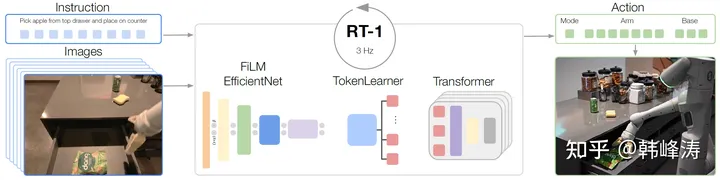

RT-1研究两个事情，第一通过Transformer Model学习得到机器人的技能，第二如何使用自然语言控制机器人的运动。

RT-1的研究团队阐述了一个很有意义的观点：

> When it comes to robotics, usefulness is determined not just bywhat robots can do, but also how we tell them to do it — for example, how we instruct a helper robot to clean up a cup of spilled coffee. That’s where natural language understanding comes into play.

尤其是上面“How we tell robot to do it”，阐述了人机交互（Human Robot Interface）的重要性。一个机器人技能再多再厉害，如果使用的难度很高很难部署，我们也很难说这个机器人是很有用的。

RT-1不是传统意义上的大模型，只是主体使用了Transformer架构，总体参数量只有35M，Transformer部分的参数量只有19M，是面向机器人操作单独训练的一个多任务机器人控制模型。

此外，RT-1很重要的一个工作成果是为期17个月的机器人操作训练数据收集，作者团队使用了fleet of robots的描述，其实只有13台机器人，整个数据收集过程使用了人工遥操作演示示教的方式进行。最后得到了一个包含700多种任务，130000多个执行片段的数据集。这个数据集后来也被应用到多个具身大模型的训练中。

前面讲的<font color="red">SayCan用大模型做任务理解和任务拆分（谷歌这帮人称之为High-Level），把一个任务拆解为若干个子任务（Sub-task）或者技能（Skill），RT-2用大模型做技能学习（Skill，Low-level），学习到的技能用于支持SayCan的任务执行</font>。



## RT-2
[paper](https://robotics-transformer2.github.io/assets/rt2.pdf), [official website](https://robotics-transformer2.github.io/), [google research](https://deepmind.google/discover/blog/rt-2-new-model-translates-vision-and-language-into-action/)

Brohan, A., Brown, N., Carbajal, J., Chebotar, Y., Chen, X., Choromanski, K., ... & Zitkovich, B. (2023). **Rt-2: Vision-language-action models transfer web knowledge to robotic control**. arXiv preprint arXiv:2307.15818. | 227

We study how vision-language models trained on Internet-scale data can be incorporated directly into end-to-end robotic control to boost generalization and enable emergent semantic reasoning. Our goal is to enable a single end-to-end trained model to both learn to map robot observations to actions and enjoy the benefits of large-scale pretraining on language and vision-language data from the web. To this end, we propose to co-fine-tune state-of-the-art vision-language models on both robotic trajectory data and Internet-scale vision-language tasks, such as visual question answering. In contrast to other approaches, we propose a simple, general recipe to achieve this goal: in order to fit both natural language responses and robotic actions into the same format, we express the actions as text tokens and incorporate them directly into the training set of the model in the same way as natural language tokens. We refer to such category of models as vision-language-action models (VLA) and instantiate an example of such a model, which we call RT-2. Our extensive evaluation (6k evaluation trials) shows that our approach leads to performant robotic policies and enables RT-2 to obtain a range of emergent capabilities from Internet-scale training. This includes significantly improved generalization to novel objects, the ability to interpret commands not present in the robot training data (such as placing an object onto a particular number or icon), and the ability to perform rudimentary reasoning in response to user commands (such as picking up the smallest or largest object, or the one closest to another object). We further show that incorporating chain of thought reasoning allows RT-2 to perform multi-stage semantic reasoning, for example figuring out which object to pick up for use as an improvised hammer (a rock), or which type of drink is best suited for someone who is too sleepy (an energy drink).

<font color="red">发布RT-1之后，团队发现这货泛化能力不行啊</font>，遇到没见过（Unseen）的任务（包括物体和环境）就傻眼，但是如果靠人工示范继续去搞更多的数据集去接着训练RT-1的模型，又是个费时费力效率很低的事，那有没有更好的办法让机器人能更快的获得更好的常识性任务的泛化能力呢？

于是：

> We study how vision-language models trained on Internet-scale data can be incorporated directly into end-to-end robotic control to boost generalization and enable emergent semantic reasoning.

RT-2的目的是为了研究将使用互联网规模数据（Internet-scale data）训练得到的VLM大模型直接用于端到端的机器人控制，提升机器人操作的泛化能力和语义推理能力。

RT-2抛弃了从头训练Transformer模型的方式，而是直接采用已有的VLM模型作为主模型，再使用更适合机器人任务的fine-tuning方法对其进行微调。简单来讲，RT-2是使用机器人数据集进行fine-tuning且其输出的text被设计成了机器人位置指令形式的VLM（PaLM-E、PaLI-X）。

此外，为了更符合机器人的应用，<font color="red">RT-2主要研究的是利用大模型的优势直接生成Low-level的机器人运动指令的内容</font>。

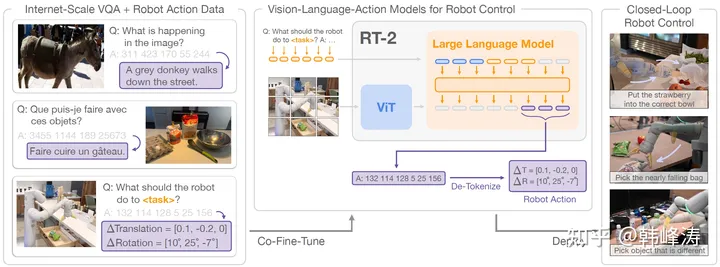
使用Web数据和机器人数据集co-fine-tuing已有的VLM大模型，并将模型的Output设计成机器人目标位置的格式

当然为了防止原有VLM模型性能退化，在fine-tuning环节同时使用了原有的Web数据和机器人操作数据集进行训练，作者称之为co-fine-tuning（这一点个人认为不是特别关键的点，相对容易想到和实施）。

RT-2证明了使用机器人技能数据集对已有的LLMs或者VLMs进行微调，可以快速的利用VLM的海量通识能力，大幅提升机器人的任务执行成功率和泛化能力。

其他的所谓VLA中的Action，更多是发文章层面的创新点，原因之一是直接生成机器人的Action并不是RT-2专属，RT-1也是Action-Generation Model，其模型输出形式也是机器人的位置指令（The RT-1 Robotics Transformer is a simple and scalable action-generation model for real-world robotics tasks.）；其次RT-2生成的Action只有机械臂末端的期望位置（Position）和姿态（Orientation），在传统机器人控制中，这最多是应用指令级别的API，甚至都不算是典型的Low-Level API范畴（详细说明参考本文第三节关于High-Level和Low-Level的内容）。

此外，<font color="red">因为RT-2的Backbone模型是PaLM-E 540B，所以无法运行在机器人的硬件上，只能部署在云端，而RT-1可以直接运行在机器人上</font>。

## UMI
[paper](https://umi-gripper.github.io/umi.pdf), [github](https://github.com/real-stanford/universal_manipulation_interface), [official website](https://umi-gripper.github.io/), Stanford

Chi, C., Xu, Z., Pan, C., Cousineau, E., Burchfiel, B., Feng, S., ... & Song, S. (2024). **Universal Manipulation Interface: In-The-Wild Robot Teaching Without In-The-Wild Robots**. arXiv preprint arXiv:2402.10329. | 3

We present Universal Manipulation Interface (UMI) -- a data collection and policy learning framework that allows direct skill transfer from in-the-wild human demonstrations to deployable robot policies. UMI employs hand-held grippers coupled with careful interface design to enable portable, low-cost, and information-rich data collection for challenging bimanual and dynamic manipulation demonstrations. To facilitate deployable policy learning, UMI incorporates a carefully designed policy interface with inference-time latency matching and a relative-trajectory action representation. The resulting learned policies are hardware-agnostic and deployable across multiple robot platforms. Equipped with these features, UMI framework unlocks new robot manipulation capabilities, allowing zero-shot generalizable dynamic, bimanual, precise, and long-horizon behaviors, by only changing the training data for each task. We demonstrate UMI's versatility and efficacy with comprehensive real-world experiments, where policies learned via UMI zero-shot generalize to novel environments and objects when trained on diverse human demonstrations. UMI's hardware and software system is open-sourced at https://umi-gripper.github.io/.


## robomimic
[paper](https://arxiv.org/abs/2108.03298), [github](https://github.com/ARISE-Initiative/robomimic), [official website](https://robomimic.github.io/)

Mandlekar, A., Xu, D., Wong, J., Nasiriany, S., Wang, C., Kulkarni, R., ... & Martín-Martín, R. (2021). **What matters in learning from offline human demonstrations for robot manipulation**. arXiv preprint arXiv:2108.03298. | 228

Imitating human demonstrations is a promising approach to endow robots with various manipulation capabilities. While recent advances have been made in imitation learning and batch (offline) reinforcement learning, a lack of open-source human datasets and reproducible learning methods make assessing the state of the field difficult. In this paper, we conduct an extensive study of six offline learning algorithms for robot manipulation on five simulated and three real-world multi-stage manipulation tasks of varying complexity, and with datasets of varying quality. Our study analyzes the most critical challenges when learning from offline human data for manipulation. Based on the study, we derive a series of lessons including the sensitivity to different algorithmic design choices, the dependence on the quality of the demonstrations, and the variability based on the stopping criteria due to the different objectives in training and evaluation. We also highlight opportunities for learning from human datasets, such as the ability to learn proficient policies on challenging, multi-stage tasks beyond the scope of current reinforcement learning methods, and the ability to easily scale to natural, real-world manipulation scenarios where only raw sensory signals are available. We have open-sourced our datasets and all algorithm implementations to facilitate future research and fair comparisons in learning from human demonstration data. Codebase, datasets, trained models, and more available at this https URL


## RoboCat
[paper](https://arxiv.org/abs/2306.11706), [github](https://github.com/kyegomez/RoboCAT), [google research](https://deepmind.google/discover/blog/robocat-a-self-improving-robotic-agent/)

Bousmalis, K., Vezzani, G., Rao, D., Devin, C. M., Lee, A. X., Villalonga, M. B., ... & Heess, N. (2023). **RoboCat: A Self-Improving Generalist Agent for Robotic Manipulation**. Transactions on Machine Learning Research. | 0

The ability to leverage heterogeneous robotic experience from different robots and tasks to quickly master novel skills and embodiments has the potential to transform robot learning. Inspired by recent advances in foundation models for vision and language, we propose a multi-embodiment, multi-task generalist agent for robotic manipulation. This agent, named RoboCat, is a visual goal-conditioned decision transformer capable of consuming action-labelled visual experience. This data spans a large repertoire of motor control skills from simulated and real robotic arms with varying sets of observations and actions. With RoboCat, we demonstrate the ability to generalise to new tasks and robots, both zero-shot as well as through adaptation using only 100-1000 examples for the target task. We also show how a trained model itself can be used to generate data for subsequent training iterations, thus providing a basic building block for an autonomous improvement loop. We investigate the agent's capabilities, with large-scale evaluations both in simulation and on three different real robot embodiments. We find that as we grow and diversify its training data, RoboCat not only shows signs of cross-task transfer, but also becomes more efficient at adapting to new tasks.

当前训练机器人大模型/具身大模型面临的最主要的挑战之一是高质量训练数据非常欠缺，前面提到的RT-1、RT-2以及PaLM-E中所使用的机器人数据集绝大部分数据是通过人工示范与人工遥操作的方式收集的，费时费力，效率很低。如果可以通过某种方式自动生成机器人的训练数据，无疑可以节约大量时间和人工成本。

RoboCat基于DeepMind最新的多模态通用大模型Gato（西班牙语中“猫”的意思）创建，除了能实现与前面所讲的其他机器人大模型/具身大模型类似的场景识别、任务推理拆解、机器人控制功能之外，<font color="red">一个比较重要的创新是在之前需要大量人工远程操作演示的方式来提供机器人数据集的基础上，RoboCat可以通过自己生成机器人训练数据集的方式来更快完善其能力。</font>

整个过程首先通过一系列的机器人数据集对于Gato模型进行第一轮的训练，之后便进入作者称之为自改进（self-improvement）的训练环节，该环节包括一系列之前机器人没有见过的任务，整个学习过程包括5步：

1. 对于每个新任务或者新机械臂，通过人工控制机械臂，收集100-1000个演示过程；
2. 针对该新任务/机器人，对RoboCat进行微调，生成一个新的分支；
3. 新生成的分支自己在新任务/机械臂上练习10000次，产生更多的训练数据；
4. 把人工示教和机器人自己生成的数据并入到RoboCat已有的数据集中；
5. 使用最新的数据集训练新版本的RoboCat；
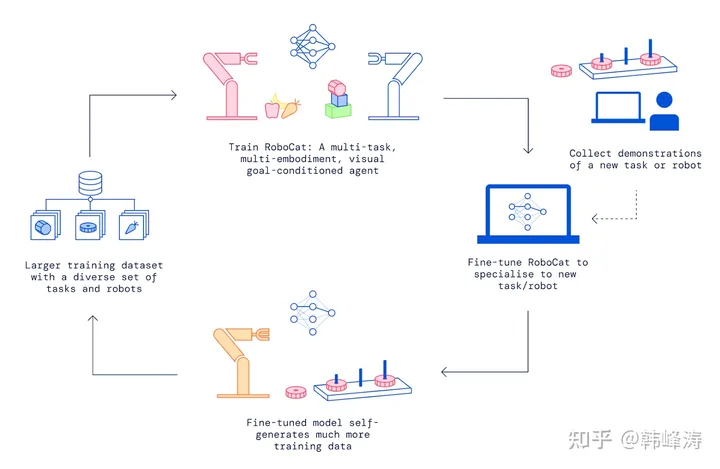
首先通过人工示教数百次建立新任务基础能力，然后通过机器人自己生成的训练数据，加快其技能学习速度。

在长达50页的论文中，RoboCat团队研究了如何在单一模型里支持多个机器人，多任务间技能迁移的效果如何，跨机器人的技能迁移效果如何，虚实迁移（sim-to-real）的效果如何，模型架构和参数缩放如何影响模型性能等多项内容，有时间的话推荐认真读一下。

这种通过机器人自动生成大批量训练数据的方式，倒是跟哆啦A梦从异次元口袋里掏出很多宝贝有些相似。

## Beyond Pick-and-Place: Tackling Robotic Stacking of Diverse Shapes
[paper](https://arxiv.org/abs/2110.06192), [github](https://github.com/google-deepmind/rgb_stacking), [google research](https://deepmind.google/discover/blog/stacking-our-way-to-more-general-robots/)

Lee, A. X., Devin, C. M., Zhou, Y., Lampe, T., Bousmalis, K., Springenberg, J. T., ... & Nori, F. (2021, June). **Beyond pick-and-place: Tackling robotic stacking of diverse shapes**. In 5th Annual Conference on Robot Learning. | 74

We study the problem of robotic stacking with objects of complex geometry. We propose a challenging and diverse set of such objects that was carefully designed to require strategies beyond a simple "pick-and-place" solution. Our method is a reinforcement learning (RL) approach combined with vision-based interactive policy distillation and simulation-to-reality transfer. Our learned policies can efficiently handle multiple object combinations in the real world and exhibit a large variety of stacking skills. In a large experimental study, we investigate what choices matter for learning such general vision-based agents in simulation, and what affects optimal transfer to the real robot. We then leverage data collected by such policies and improve upon them with offline RL. A video and a blog post of our work are provided as supplementary material.

## VoxPoser
[paper](https://voxposer.github.io/voxposer.pdf), [github](https://github.com/huangwl18/VoxPoser), [official website](https://voxposer.github.io/), Stanford

Huang, W., Wang, C., Zhang, R., Li, Y., Wu, J., & Fei-Fei, L. (2023). **VoxPoser: Composable 3d value maps for robotic manipulation with language models**. arXiv preprint arXiv:2307.05973. | 118

Large language models (LLMs) are shown to possess a wealth of actionable knowledge that can be extracted for robot manipulation in the form of reasoning and planning. Despite the progress, most still rely on pre-defined motion primitives to carry out the physical interactions with the environment, which remains a major bottleneck. In this work, we aim to synthesize robot trajectories, i.e., a dense sequence of 6-DoF end-effector waypoints, for a large variety of manipulation tasks given an open-set of instructions and an open-set of objects. We achieve this by first observing that LLMs excel at inferring affordances and constraints given a free-form language instruction. More importantly, by leveraging their code-writing capabilities, they can interact with a vision-language model (VLM) to compose 3D value maps to ground the knowledge into the observation space of the agent. The composed value maps are then used in a model-based planning framework to zero-shot synthesize closed-loop robot trajectories with robustness to dynamic perturbations. We further demonstrate how the proposed framework can benefit from online experiences by efficiently learning a dynamics model for scenes that involve contact-rich interactions. We present a large-scale study of the proposed method in both simulated and real-robot environments, showcasing the ability to perform a large variety of everyday manipulation tasks specified in free-form natural language. Videos and code at this https URL


Google系的几个机器人大模型，总体思路都是侧重于任务理解、拆分和逻辑推理，对于机器人运动控制本身尤其规划问题涉及较少，只是用端到端训练的方式生成了简单且离散分布的机械臂末端位置和底盘移动指令，未考虑连续路径和轨迹规划等更偏机器人领域的内容。

<font color="red">VoxPoser与前几个方法较大的不同点是，没有将LLM和VLM用于常见的输入文本+图像输出机器人运动的端到端控制方法，而是使用VLM和VLM的能力来将机器人的观测空间（一般为三维空间和待操作的对象）转换为一个3D值图</font>，然后就可以使用成熟的路径搜索算法（VoxPoser使用了概率路线图Probabilistic RoadMap）在3D值图上搜索生成可用的机器人运动路径。有了可用路径，接下来做轨迹规划和控制机器人运动就是当前机器人领域解决的比较好的问题了（当然VoxPoser中并未涉及更多高性能轨迹规划的讨论）。

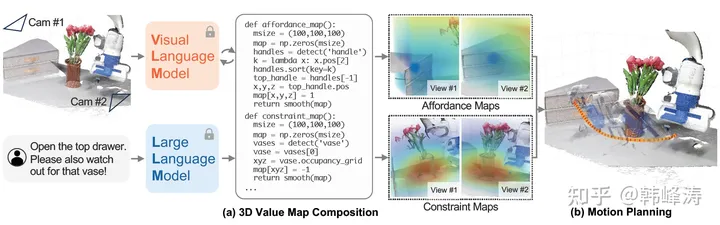

如上图所示，给定工作环境的RGB-D信息和语言指令，利用LLM的代码生成能力与VLM进行交互，生成一系列的机器人观测空间的3D affordance maps and constraint maps（统称为值图），组合而成的值图接下来被用于机器人的路径规划，整个过程并未引入任何额外的训练。

总体上，VoxPoser的方法与传统机器人界的思路更为贴近，即给定可用的工作与构型空间，使用较为成熟、可控的基于随机采样的路径规划方法进行规划，而不是把几乎所有的工作都交给大模型来做。

这种组合各种技术的优势的方案我认为是目前相对较好的研究方向，应该也是最适合、最可能落地的方向。

## ChatGPT for Robotics
[paper](https://www.microsoft.com/en-us/research/uploads/prod/2023/02/ChatGPT___Robotics.pdf), [github](https://github.com/microsoft/PromptCraft-Robotics), [microsoft research](https://www.microsoft.com/en-us/research/group/autonomous-systems-group-robotics/articles/chatgpt-for-robotics/)

Vemprala, S., Bonatti, R., Bucker, A., & Kapoor, A. (2023). **ChatGPT for robotics: Design principles and model abilities**. arXiv preprint arXiv:2306.17582. | 213

This paper presents an experimental study regarding the use of OpenAI’s ChatGPT [1] for robotics applications. We outline a strategy that combines design principles for prompt engineering and the creation of a high-level function library which allows ChatGPT to adapt to different robotics tasks, simulators, and form factors. We focus our evaluations on the effectiveness of different prompt engineering techniques and dialog strategies towards the execution of various types of robotics tasks. We explore ChatGPT’s ability to use free-form dialog, parse XML tags, and to synthesize code, in addition to the use of task-specific prompting functions and closed-loop reasoning through dialogues. Our study encompasses a range of tasks within the robotics domain, from basic logical, geometrical, and mathematical reasoning all the way to complex domains such as aerial navigation, manipulation, and embodied agents. We show that ChatGPT can be effective at solving several of such tasks, while allowing users to interact with it primarily via natural language instructions. In addition to these studies, we introduce an open-sourced research tool called PromptCraft, which contains a platform where researchers can collaboratively upload and vote on examples of good prompting schemes for robotics applications, as well as a sample robotics simulator with ChatGPT integration, making it easier for users to get started with using ChatGPT for robotics.

## BC-Z
[paper](https://openreview.net/pdf?id=8kbp23tSGYv), [github](https://github.com/google-research/tensor2robot/tree/master/research/bcz), [official website](https://sites.google.com/view/bc-z/home), [google research](https://blog.research.google/2022/02/can-robots-follow-instructions-for-new.html), [dataset](https://www.kaggle.com/datasets/google/bc-z-robot)

Jang, E., Irpan, A., Khansari, M., Kappler, D., Ebert, F., Lynch, C., ... & Finn, C. (2022, January). **BC-Z: Zero-shot task generalization with robotic imitation learning. In Conference on Robot Learning** (pp. 991-1002). PMLR. | 288

In this paper, we study the problem of enabling a vision-based robotic manipulation system to generalize to novel tasks, a long-standing challenge in robot learning. We approach the challenge from an imitation learning perspective, aiming to study how scaling and broadening the data collected can facilitate such generalization. To that end, we develop an interactive and flexible imitation learning system that can learn from both demonstrations and interventions and can be conditioned on different forms of information that convey the task, including pre-trained embeddings of natural language or videos of humans performing the task. When scaling data collection on a real robot to more than 100 distinct tasks, we find that this system can perform 24 unseen manipulation tasks with an average success rate of 44%, without any robot demonstrations for those tasks.

TensorFlow 优先级较低

## CLIPort
[paper](https://arxiv.org/pdf/2109.12098.pdf), [github](https://github.com/cliport/cliport), [official website](https://cliport.github.io/), NVIDIA

Shridhar, M., Manuelli, L., & Fox, D. (2022, January). **Cliport: What and where pathways for robotic manipulation**. In Conference on robot learning (pp. 894-906). PMLR. | 404

How can we imbue robots with the ability to manipulate objects precisely but also to reason about them in terms of abstract concepts?
Recent works in manipulation have shown that end-to-end networks can learn dexterous skills that require precise spatial reasoning, but these methods often fail to generalize to new goals or quickly learn transferable concepts across tasks. In parallel, there has been great progress in learning generalizable semantic representations for vision and language by training on large-scale internet data, however these representations lack the spatial understanding necessary for fine-grained manipulation. To this end, we propose a framework that combines the best of both worlds: a two-stream architecture with semantic and spatial pathways for vision-based manipulation. Specifically, we present CLIPort, a language-conditioned imitation-learning agent that combines the broad semantic understanding (what) of CLIP with the spatial precision (where) of TransporterNets.
Our end-to-end framework is capable of solving a variety of language-specified tabletop tasks from packing unseen objects to folding cloths, all without any explicit representations of object poses, instance segmentations, memory, symbolic states, or syntactic structures. Experiments in simulation and hardware show that our approach is data-efficient and generalizes effectively to seen and unseen semantic concepts. We even train one multi-task policy for 10 simulated and 9 real-world tasks that shows better or comparable performance to single-task policies.

## Where are we in the search for an Artificial Visual Cortex for Embodied Intelligence?(VC-1)

[paper](https://arxiv.org/abs/2303.18240), [github](https://github.com/facebookresearch/eai-vc), [official website](https://eai-vc.github.io/), facebook research, [dataset](https://github.com/facebookresearch/eai-vc/blob/main/cortexbench/DATASETS.md)

Majumdar, A., Yadav, K., Arnaud, S., Ma, J., Chen, C., Silwal, S., ... & Meier, F. (2024). **Where are we in the search for an artificial visual cortex for embodied intelligence?**. Advances in Neural Information Processing Systems, 36. | 57

We present the largest and most comprehensive empirical study of pre-trained visual representations (PVRs) or visual 'foundation models' for Embodied AI. First, we curate CortexBench, consisting of 17 different tasks spanning locomotion, navigation, dexterous, and mobile manipulation. Next, we systematically evaluate existing PVRs and find that none are universally dominant. To study the effect of pre-training data size and diversity, we combine over 4,000 hours of egocentric videos from 7 different sources (over 4.3M images) and ImageNet to train different-sized vision transformers using Masked Auto-Encoding (MAE) on slices of this data. Contrary to inferences from prior work, we find that scaling dataset size and diversity does not improve performance universally (but does so on average). Our largest model, named VC-1, outperforms all prior PVRs on average but does not universally dominate either. Next, we show that task- or domain-specific adaptation of VC-1 leads to substantial gains, with VC-1 (adapted) achieving competitive or superior performance than the best known results on all of the benchmarks in CortexBench. Finally, we present real-world hardware experiments, in which VC-1 and VC-1 (adapted) outperform the strongest pre-existing PVR. Overall, this paper presents no new techniques but a rigorous systematic evaluation, a broad set of findings about PVRs (that in some cases, refute those made in narrow domains in prior work), and open-sourced code and models (that required over 10,000 GPU-hours to train) for the benefit of the research community.

## R3M
[paper](https://arxiv.org/abs/2203.12601), [github](https://github.com/facebookresearch/r3m), [official website](https://sites.google.com/view/robot-r3m), Meta AI, Stanford University

Nair, S., Rajeswaran, A., Kumar, V., Finn, C., & Gupta, A. (2022). **R3M: A universal visual representation for robot manipulation**. arXiv preprint arXiv:2203.12601. | 283

We study how visual representations pre-trained on diverse human video data can enable data-efficient learning of downstream robotic manipulation tasks. Concretely, we pre-train a visual representation using the Ego4D human video dataset using a combination of time-contrastive learning, video-language alignment, and an L1 penalty to encourage sparse and compact representations. The resulting representation, R3M, can be used as a frozen perception module for downstream policy learning. Across a suite of 12 simulated robot manipulation tasks, we find that R3M improves task success by over 20% compared to training from scratch and by over 10% compared to state-of-the-art visual representations like CLIP and MoCo. Furthermore, R3M enables a Franka Emika Panda arm to learn a range of manipulation tasks in a real, cluttered apartment given just 20 demonstrations. Code and pre-trained models are available at this https URL.


## VIMA
[paper](https://vimalabs.github.io/assets/vima_paper.pdf), [github](https://github.com/vimalabs/VIMA), [official website](https://vimalabs.github.io/), Stanford, NVIDIA, [dataset](https://huggingface.co/datasets/VIMA/VIMA-Data)

Jiang, Y., Gupta, A., Zhang, Z., Wang, G., Dou, Y., Chen, Y., ... & Fan, L. (2022, November). **VIMA: General robot manipulation with multimodal prompts**. In NeurIPS 2022 Foundation Models for Decision Making Workshop. | 111

Prompt-based learning has emerged as a successful paradigm in natural language processing, where a single general-purpose language model can be instructed to perform any task specified by input prompts. Yet task specification in robotics comes in various forms, such as imitating one-shot demonstrations, following language instructions, and reaching visual goals. They are often considered different tasks and tackled by specialized models. We show that a wide spectrum of robot manipulation tasks can be expressed with multimodal prompts, interleaving textual and visual tokens. Accordingly, we develop a new simulation benchmark that consists of thousands of procedurally-generated tabletop tasks with multimodal prompts, 600K+ expert trajectories for imitation learning, and a four-level evaluation protocol for systematic generalization. We design a transformer-based robot agent, VIMA, that processes these prompts and outputs motor actions autoregressively. VIMA features a recipe that achieves strong model scalability and data efficiency. It outperforms alternative designs in the hardest zero-shot generalization setting by up to 2.9\times task success rate given the same training data. With 10\times less training data, VIMA still performs 2.7\times better than the best competing variant. Code and video demos are available at this https URL

## Voltron
[paper](https://arxiv.org/pdf/2302.12766.pdf?trk=public_post_comment-text), [github](https://github.com/siddk/voltron-robotics)

Karamcheti, S., Nair, S., Chen, A. S., Kollar, T., Finn, C., Sadigh, D., & Liang, P. (2023). **Language-driven representation learning for robotics**. arXiv preprint arXiv:2302.12766. | 59

Recent work in visual representation learning for robotics demonstrates the viability of learning from large video datasets of humans performing everyday tasks. Leveraging methods such as masked autoencoding and contrastive learning, these representations exhibit strong transfer to policy learning for visuomotor control. But, robot learning encompasses a diverse set of problems beyond control including grasp affordance prediction, language-conditioned imitation learning, and intent scoring for human-robot collaboration, amongst others. First, we demonstrate that existing representations yield inconsistent results across these tasks: masked autoencoding approaches pick up on low-level spatial features at the cost of high-level semantics, while contrastive learning approaches capture the opposite. We then introduce Voltron, a framework for language-driven representation learning from human videos and associated captions. Voltron trades off language-conditioned visual reconstruction to learn low-level visual patterns, and visually-grounded language generation to encode high-level semantics. We also construct a new evaluation suite spanning five distinct robot learning problems $\unicode{x2013}$ a unified platform for holistically evaluating visual representations for robotics. Through comprehensive, controlled experiments across all five problems, we find that Voltron's language-driven representations outperform the prior state-of-the-art, especially on targeted problems requiring higher-level features.


## Gato
[paper](https://arxiv.org/pdf/2205.06175.pdf?fs=e&s=cl), [github](https://github.com/OrigamiDream/gato), [google research](https://deepmind.google/discover/blog/a-generalist-agent/)

Reed, S., Zolna, K., Parisotto, E., Colmenarejo, S. G., Novikov, A., Barth-Maron, G., ... & de Freitas, N. (2022). **A generalist agent**. arXiv preprint arXiv:2205.06175. | 640

Inspired by progress in large-scale language modeling, we apply a similar approach towards building a single generalist agent beyond the realm of text outputs. The agent, which we refer to as Gato, works as a multi-modal, multi-task, multi-embodiment generalist policy. The same network with the same weights can play Atari, caption images, chat, stack blocks with a real robot arm and much more, deciding based on its context whether to output text, joint torques, button presses, or other tokens. In this report we describe the model and the data, and document the current capabilities of Gato.

## Open-World Object Manipulation using Pre-trained Vision-Language Models(MOO)
[paper](https://arxiv.org/abs/2303.00905), [official website](https://robot-moo.github.io/), google research

Stone, A., Xiao, T., Lu, Y., Gopalakrishnan, K., Lee, K. H., Vuong, Q., ... & Hausman, K. (2023). **Open-world object manipulation using pre-trained vision-language models**. arXiv preprint arXiv:2303.00905.

For robots to follow instructions from people, they must be able to connect the rich semantic information in human vocabulary, e.g. "can you get me the pink stuffed whale?"" to their sensory observations and actions. This brings up a notably difficult challenge for robots: while robot learning approaches allow robots to learn many different behaviors from first-hand experience, it is impractical for robots to have first-hand experiences that span all of this semantic information. We would like a robot's policy to be able to perceive and pick up the pink stuffed whale, even if it has never seen any data interacting with a stuffed whale before. Fortunately, static data on the internet has vast semantic information, and this information is captured in pre-trained vision-language models. In this paper, we study whether we can interface robot policies with these pre-trained models, with the aim of allowing robots to complete instructions involving object categories that the robot has never seen first-hand. We develop a simple approach, which we call Manipulation of Open-World Objects (MOO), which leverages a pre-trained vision-language model to extract object-identifying information from the language command and image, and conditions the robot policy on the current image, the instruction, and the extracted object information. In a variety of experiments on a real mobile manipulator, we find that MOO generalizes zero-shot to a wide range of novel object categories and environments. In addition, we show how MOO generalizes to other, non-language-based input modalities to specify the object of interest such as finger pointing, and how it can be further extended to enable open-world navigation and manipulation.

## EmbodiedGPT
[paper](https://arxiv.org/pdf/2305.15021.pdf), [official website](https://embodiedgpt.github.io/)

Mu, Y., Zhang, Q., Hu, M., Wang, W., Ding, M., Jin, J., ... & Luo, P. (2024). **EmbodiedGPT: Vision-language pre-training via embodied chain of thought**. Advances in Neural Information Processing Systems, 36.

Embodied AI is a crucial frontier in robotics, capable of planning and executing action sequences for robots to accomplish long-horizon tasks in physical environments. In this work, we introduce EmbodiedGPT, an end-to-end multi-modal foundation model for embodied AI, empowering embodied agents with multi-modal understanding and execution capabilities. To achieve this, we have made the following efforts:(i) We craft a large-scale embodied planning dataset, termed EgoCOT. The dataset consists of carefully selected videos from the Ego4D dataset, along with corresponding high-quality language instructions. Specifically, we generate a sequence of sub-goals with the" Chain of Thoughts" mode for effective embodied planning.(ii) We introduce an efficient training approach to EmbodiedGPT for high-quality plan generation, by adapting a 7B large language model (LLM) to the EgoCOT dataset via prefix tuning.(iii) We introduce a paradigm for extracting task-related features from LLM-generated planning queries to form a closed loop between high-level planning and low-level control. Extensive experiments show the effectiveness of EmbodiedGPT on embodied tasks, including embodied planning, embodied control, visual captioning, and visual question answering. Notably, EmbodiedGPT significantly enhances the success rate of the embodied control task by extracting more effective features. It has achieved a remarkable 1.6 times increase in success rate on the Franka Kitchen benchmark and a 1.3 times increase on the Meta-World benchmark, compared to the BLIP-2 baseline fine-tuned with the Ego4D dataset.


## DIAL
[paper](https://arxiv.org/abs/2211.11736), [official website](https://instructionaugmentation.github.io/), google research

Xiao, T., Chan, H., Sermanet, P., Wahid, A., Brohan, A., Hausman, K., ... & Tompson, J. (2022). **Robotic skill acquisition via instruction augmentation with vision-language models**. arXiv preprint arXiv:2211.11736. | 41

In recent years, much progress has been made in learning robotic manipulation policies that follow natural language instructions. Such methods typically learn from corpora of robot-language data that was either collected with specific tasks in mind or expensively re-labelled by humans with rich language descriptions in hindsight. Recently, large-scale pretrained vision-language models (VLMs) like CLIP or ViLD have been applied to robotics for learning representations and scene descriptors. Can these pretrained models serve as automatic labelers for robot data, effectively importing Internet-scale knowledge into existing datasets to make them useful even for tasks that are not reflected in their ground truth annotations? To accomplish this, we introduce Data-driven Instruction Augmentation for Language-conditioned control (DIAL): we utilize semi-supervised language labels leveraging the semantic understanding of CLIP to propagate knowledge onto large datasets of unlabelled demonstration data and then train language-conditioned policies on the augmented datasets. This method enables cheaper acquisition of useful language descriptions compared to expensive human labels, allowing for more efficient label coverage of large-scale datasets. We apply DIAL to a challenging real-world robotic manipulation domain where 96.5% of the 80,000 demonstrations do not contain crowd-sourced language annotations. DIAL enables imitation learning policies to acquire new capabilities and generalize to 60 novel instructions unseen in the original dataset.


## Human-Timescale Adaptation in an Open-Ended Task Space
[paper](https://arxiv.org/abs/2301.07608), [google research](https://sites.google.com/view/adaptive-agent/)

Xiao, T., Chan, H., Sermanet, P., Wahid, A., Brohan, A., Hausman, K., ... & Tompson, J. (2022). **Robotic skill acquisition via instruction augmentation with vision-language models**. arXiv preprint arXiv:2211.11736.

Foundation models have shown impressive adaptation and scalability in supervised and self-supervised learning problems, but so far these successes have not fully translated to reinforcement learning (RL). In this work, we demonstrate that training an RL agent at scale leads to a general in-context learning algorithm that can adapt to open-ended novel embodied 3D problems as quickly as humans. In a vast space of held-out environment dynamics, our adaptive agent (AdA) displays on-the-fly hypothesis-driven exploration, efficient exploitation of acquired knowledge, and can successfully be prompted with first-person demonstrations. Adaptation emerges from three ingredients: (1) meta-reinforcement learning across a vast, smooth and diverse task distribution, (2) a policy parameterised as a large-scale attention-based memory architecture, and (3) an effective automated curriculum that prioritises tasks at the frontier of an agent's capabilities. We demonstrate characteristic scaling laws with respect to network size, memory length, and richness of the training task distribution. We believe our results lay the foundation for increasingly general and adaptive RL agents that perform well across ever-larger open-ended domains.


todo: 
- [Everything-LLMs-And-Robotics](https://github.com/jrin771/Everything-LLMs-And-Robotics)
- [万字长文（2）：我们需要什么样的机器人大模型？](https://zhuanlan.zhihu.com/p/647519538?utm_psn=1753370443376259073)
- [面向通用机器人的基础模型：综述和综合分析](https://zhuanlan.zhihu.com/p/672534947?utm_psn=1753351398702657536)
- [谷歌发布全球最大视觉语言模型 PaLM-E，5620 亿参数，几乎拥有所有语言能力，哪些信息值得关注？](https://www.zhihu.com/question/588441399/answer/2929011491?utm_psn=1753349685363023872)
- [VoxPoser: 采用语言模型实现机器人操作的可组合3D价值图](https://zhuanlan.zhihu.com/p/656085638?utm_psn=1753348974231457792)
- [大语言模型在机器人上的应用](https://zhuanlan.zhihu.com/p/616976210?utm_psn=1753363125343301632)
- [Robotics+LLM系列通过大语言模型控制机器人](https://zhuanlan.zhihu.com/p/668053911?utm_psn=1753363425378701312)
- [大语言模型控制机器人——微软ChatGPT for Robotics论文解读](https://zhuanlan.zhihu.com/p/652094830?utm_psn=1753363707839766529)
- [一个允许机器人通过利用大型语言模型创造性地使用工具的系统](https://zhuanlan.zhihu.com/p/667747798?utm_psn=1753364342433542145)
- [RoboFlamingo: 开源视觉语言机器人大模型](https://zhuanlan.zhihu.com/p/665261893?utm_psn=1753364562509025280)
- [大模型加持的机器人有多强，MIT CSAIL&IAIFI用自然语言指导机器人抓取物体](https://zhuanlan.zhihu.com/p/651351204?utm_psn=1753364692867678208)
- [机器人大语言模型运动控制原理浅析-SayCan(Google Robotics)](https://zhuanlan.zhihu.com/p/669905933?utm_psn=1753364937337139200)
- [机器人大语言模型运动控制原理浅析-RT-1(Google Robotics)](https://zhuanlan.zhihu.com/p/670970789?utm_psn=1753365173241516033)
- [语言模型操控机器人——李飞飞VoxPoser论文解读](https://zhuanlan.zhihu.com/p/651670658?utm_psn=1753369050984615936)
- [GenSim：通过大语言模型生成机器人仿真任务](https://zhuanlan.zhihu.com/p/661690326?utm_psn=1753369947110301696)
- [使用大型语言模型进行机器人抓取的决策制定Decision-Making in Robotic Grasping with Large Language Models](https://zhuanlan.zhihu.com/p/686145370?utm_psn=1753370093805830144)
- [具身智能：大语言模型赋能机械臂规划控制](https://zhuanlan.zhihu.com/p/648023912?utm_psn=1753370247778729984)
- [大语言模型的交互规划完成局部可观测的机器人任务](https://zhuanlan.zhihu.com/p/674764123?utm_psn=1753370675924877312)
- [LM-Nav：通过语言、视觉和动作的大型预训练模型进行机器人导航](https://zhuanlan.zhihu.com/p/664484743?utm_psn=1753370838303367168)
- [懒人福音！谷歌让机器训练机器，用大语言模型定制你的家务机器人](https://zhuanlan.zhihu.com/p/631258462?utm_psn=1753371682302353408)
- [谷歌 DeepMind 利用大模型研发出机器人项目 RT-2，如何评价这一成果？](https://www.zhihu.com/question/614768538/answer/3142555110?utm_psn=1753371903019216900)
- [OpenAI大模型上身机器人，原速演示炸场！](https://zhuanlan.zhihu.com/p/686905288?utm_psn=1753372148612493312)

1. UC 伯克利的 LM Nav 用三个大模型（视觉导航模型 ViNG、大型语言模型 GPT-3、视觉语言模型 CLIP）教会了机器人在不看地图的情况下按照语言指令到达目的地[强化学习大牛Sergey Levine新作：三个大模型教会机器人认路 《机器之心》 2022-07-24]。

4. Sim2Real
